In [34]:
#import useful libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import pickle
import configuration
import general_statistics as stats
import figures as figs
import matplotlib.cm as cm
from matplotlib import colors
from scipy import signal
from scipy import stats as sstats
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import scipy
cmap = cm.jet
import math
from sklearn.datasets import load_iris
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.cross_decomposition import CCA
from sklearn.model_selection import cross_val_score
import random
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

In [35]:
input_directory = os.environ['PROJECT_DIR'] + 'neural_analysis/data/mean_representational_distance/occupancy/'
figure_path = os.environ['PROJECT_DIR'] +'neural_analysis/figures/mean_representational_distance/'

In [36]:
mouse_vector = [56165, 32363, 32364, 32365, 411857, 411857, 401714]
conditions_vector = ['RANDOM', 'OVERLAPPING','STABLE']
sessions_random = [4,1,0,2,2,6,2] # total = 6
sessions_overlapping = [1,2,1,0,3,5,0] # total = 6
fixed_corner = [3,4,2,0,1,4,0]
sessions_stable = [2,0,2,0,1,4,1] # total = 5 (4 and 1/2)

In [37]:
mouse = 32363
session = 1
file_name = input_directory + 'distance_matrix_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '.npy'
if os.path.isfile(file_name):
    distance = np.load(file_name)

In [38]:
empty_corners_random = []
occupied_corners_random = []

empty_corners_overlapping = []
occupied_corners_overlapping = []

empty_corners_stable = []
occupied_corners_stable = []

fixed_corner_data = []

for i in range(len(mouse_vector)):
    mouse = mouse_vector[i]
    #### check session_random
    session = sessions_random[i]
    if session:
        file_name = input_directory + 'distance_matrix_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '.npy'
        if os.path.isfile(file_name):
            distance = np.load(file_name)
            
            empty_corners_random.append(distance[:,1,:])
            occupied_corners_random.append(distance[:,0,:])
            
    session = sessions_overlapping[i]
    if session:
        file_name = input_directory + 'distance_matrix_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '.npy'
        if os.path.isfile(file_name):
            distance = np.load(file_name)
            fixed_corner_data.append(fixed_corner[i])
            empty_corners_overlapping.append(distance[:,1,:])
            occupied_corners_overlapping.append(distance[:,0,:])
            
    session = sessions_stable[i]
    if session:
        file_name = input_directory + 'distance_matrix_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '.npy'
        if os.path.isfile(file_name):
            distance = np.load(file_name)
            
            empty_corners_stable.append(distance[:,1,:])
            occupied_corners_stable.append(distance[:,0,:])

In [39]:
### RANDOM
empty_corners_mean_random = np.zeros((6))
empty_corners_std_random = np.zeros((6))
occupied_corners_mean_random = np.zeros((6))
occupied_corners_std_random = np.zeros((6))
for i in range(len(occupied_corners_random)):
    for j in range(6):
        for k in range(4):
            occupied_corners_mean_random[j]+=occupied_corners_random[i][j,k]
            occupied_corners_std_random[j]+=occupied_corners_random[i][j,k]**2
            empty_corners_mean_random[j]+=empty_corners_random[i][j,k]
            empty_corners_std_random[j]+=empty_corners_random[i][j,k]**2
occupied_corners_mean_random= occupied_corners_mean_random/(len(occupied_corners_random)*4)
occupied_corners_std_random = np.sqrt(occupied_corners_std_random/(len(occupied_corners_random)*4) - occupied_corners_mean_random**2)
occupied_corners_sem_random = occupied_corners_std_random / np.sqrt((len(occupied_corners_random)*4)**2 -1)
empty_corners_mean_random = empty_corners_mean_random/(len(empty_corners_random)*4)
empty_corners_std_random = np.sqrt(empty_corners_std_random/(len(empty_corners_random)*4) - empty_corners_mean_random**2)
empty_corners_sem_random = empty_corners_std_random / np.sqrt((len(empty_corners_random)*4)**2 -1)

            
##STABLE
occupied_corners_mean_stable = np.zeros((6))
occupied_corners_std_stable = np.zeros((6))
empty_corners_mean_stable = np.zeros((6))
empty_corners_std_stable = np.zeros((6))
for i in range(len(occupied_corners_stable)):
    for j in range(6):
        for k in range(4):
            if np.isnan(occupied_corners_stable[i][j,k]) == False:
                occupied_corners_mean_stable[j]+=occupied_corners_stable[i][j,k]
                occupied_corners_std_stable[j]+=occupied_corners_stable[i][j,k]**2
            if np.isnan(empty_corners_stable[i][j,k]) == False:
                empty_corners_mean_stable[j]+=empty_corners_stable[i][j,k]
                empty_corners_std_stable[j]+=empty_corners_stable[i][j,k]**2
                
occupied_corners_mean_stable= occupied_corners_mean_stable/(len(occupied_corners_stable)*2)
occupied_corners_std_stable = np.sqrt(occupied_corners_std_stable/(len(occupied_corners_stable)*2) - occupied_corners_mean_stable**2)
occupied_corners_sem_stable = occupied_corners_std_stable / np.sqrt((len(occupied_corners_stable)*2)**2 -1)
empty_corners_mean_stable = empty_corners_mean_stable/(len(empty_corners_stable)*2)
empty_corners_std_stable = np.sqrt(empty_corners_std_stable/(len(empty_corners_stable)*2) - empty_corners_mean_stable**2)
empty_corners_sem_stable = empty_corners_std_stable / np.sqrt((len(occupied_corners_stable)*2)**2 -1)


empty_corners_mean_overlapping = np.zeros((6))
empty_corners_std_overlapping = np.zeros((6))
for i in range(len(occupied_corners_overlapping)):
    for j in range(6):
        for k in range(4):
            if np.isnan(empty_corners_overlapping[i][j,k]) == False:
                empty_corners_mean_overlapping[j]+=empty_corners_overlapping[i][j,k]
                empty_corners_std_overlapping[j]+=empty_corners_overlapping[i][j,k]**2
empty_corners_mean_overlapping = empty_corners_mean_overlapping/(len(empty_corners_overlapping)*3)
empty_corners_std_overlapping = np.sqrt(empty_corners_std_overlapping/(len(empty_corners_overlapping)*3) - empty_corners_mean_overlapping**2)
empty_corners_sem_overlapping = empty_corners_std_overlapping/ np.sqrt((len(empty_corners_overlapping)*3)**2 -1)

occupied_corners_mean_overlapping_fix = np.zeros((6))
occupied_corners_std_overlapping_fix = np.zeros((6))

for i in range(len(occupied_corners_overlapping)):
    for j in range(6):
        occupied_corners_mean_overlapping_fix[j] += occupied_corners_overlapping[i][j,fixed_corner_data[i]-1]
        occupied_corners_std_overlapping_fix[j] +=occupied_corners_overlapping[i][j,fixed_corner_data[i]-1]**2
occupied_corners_mean_overlapping_fix = occupied_corners_mean_overlapping_fix/len(occupied_corners_overlapping)
occupied_corners_std_overlapping_fix = np.sqrt(occupied_corners_std_overlapping_fix/len(occupied_corners_overlapping) - occupied_corners_mean_overlapping_fix**2)
occupied_corners_sem_overlapping_fix = occupied_corners_std_overlapping_fix / np.sqrt((len(occupied_corners_overlapping))**2 -1)

occupied_corners_mean_overlapping_mov = np.zeros((6))
occupied_corners_std_overlapping_mov = np.zeros((6))
for i in range(len(occupied_corners_overlapping)):
    for j in range(6):
        for k in range(4):
            occupied_corners_mean_overlapping_mov[j]+=occupied_corners_overlapping[i][j,k]
            occupied_corners_std_overlapping_mov[j]+=occupied_corners_overlapping[i][j,k]**2
        occupied_corners_mean_overlapping_mov[j] =  occupied_corners_mean_overlapping_mov[j] - occupied_corners_overlapping[i][j,fixed_corner_data[i]-1]
        occupied_corners_std_overlapping_mov[j] =  occupied_corners_std_overlapping_mov[j] - occupied_corners_overlapping[i][j,fixed_corner_data[i]-1]**2
occupied_corners_mean_overlapping_mov = occupied_corners_mean_overlapping_mov / (len(occupied_corners_overlapping)*3)   
occupied_corners_std_overlapping_mov =np.sqrt(occupied_corners_std_overlapping_mov / (len(occupied_corners_overlapping)*3)  - occupied_corners_mean_overlapping_mov**2)
occupied_corners_sem_overlapping_mov = occupied_corners_std_overlapping_mov / np.sqrt((len(occupied_corners_overlapping)*3)**2 -1)



In [40]:
occupied_corners_std_overlapping_mov

array([0.59114086, 0.93490759, 0.50670453, 1.44232342, 1.17224901,
       0.5649473 ])

In [41]:
empty_corners_mean_overlapping

array([1.14456171, 1.41320421, 0.29590152, 2.21731924, 2.36151977,
       1.88240977])

RANDOM =  5
STABLE =  4
OVERLAPPING = 5


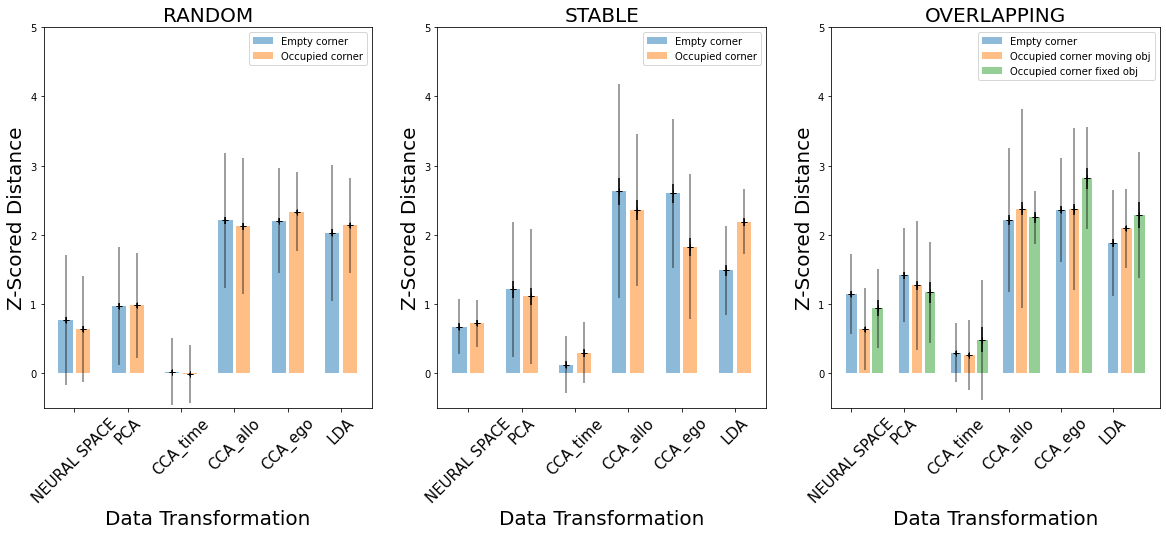

In [48]:
fig, axes = plt.subplots(1,3)

label = ['NEURAL SPACE','PCA','CCA_time','CCA_allo','CCA_ego','LDA']
xpos = np.arange(0,6)*3 + 0.5

axes[0].bar(np.arange(0,6)*3,empty_corners_mean_random, alpha = 0.5)
axes[0].bar(np.arange(0,6)*3+1,occupied_corners_mean_random, alpha = 0.5)
axes[0].errorbar(np.arange(0,6)*3, empty_corners_mean_random, empty_corners_std_random, fmt="+", color="k",alpha = 0.5)
axes[0].errorbar(np.arange(0,6)*3+1, occupied_corners_mean_random, occupied_corners_std_random, fmt="+", color="k",alpha = 0.5)
axes[0].errorbar(np.arange(0,6)*3, empty_corners_mean_random, empty_corners_sem_random, fmt="+", color="k")
axes[0].errorbar(np.arange(0,6)*3+1, occupied_corners_mean_random, occupied_corners_sem_random, fmt="+", color="k")

axes[0].legend(['Empty corner','Occupied corner'])
axes[0].set_xticks(xpos)
axes[0].set_xticklabels(label, fontsize = 15)
for tick in axes[0].get_xticklabels():
    tick.set_rotation(45)

axes[0].set_ylabel('Z-Scored Distance', fontsize = 20)
axes[0].set_xlabel('Data Transformation', fontsize = 20)
axes[0].set_title('RANDOM', fontsize = 20)

    
axes[1].bar(np.arange(0,6)*3,empty_corners_mean_stable, alpha = 0.5)
axes[1].bar(np.arange(0,6)*3+1,occupied_corners_mean_stable, alpha = 0.5)
axes[1].errorbar(np.arange(0,6)*3+1, occupied_corners_mean_stable, occupied_corners_std_stable, fmt="+",color="k",alpha = 0.5)
axes[1].errorbar(np.arange(0,6)*3, empty_corners_mean_stable, empty_corners_std_stable, fmt="+", color="k",alpha = 0.5)
axes[1].errorbar(np.arange(0,6)*3+1, occupied_corners_mean_stable, occupied_corners_sem_stable, fmt="+", color="k")
axes[1].errorbar(np.arange(0,6)*3, empty_corners_mean_stable, empty_corners_sem_stable, fmt="+", color="k")
axes[1].legend(['Empty corner','Occupied corner'])
axes[1].set_xticks(xpos)
axes[1].set_xticklabels(label, fontsize = 15)
for tick in axes[1].get_xticklabels():
    tick.set_rotation(45)
axes[1].set_ylabel('Z-Scored Distance', fontsize = 20)
axes[1].set_xlabel('Data Transformation', fontsize = 20)
axes[1].set_title('STABLE', fontsize = 20)


axes[2].bar(np.arange(0,6)*4,empty_corners_mean_overlapping, alpha = 0.5)
axes[2].bar(np.arange(0,6)*4+1,occupied_corners_mean_overlapping_mov, alpha = 0.5)
axes[2].bar(np.arange(0,6)*4+2,occupied_corners_mean_overlapping_fix, alpha = 0.5)
axes[2].errorbar(np.arange(0,6)*4, empty_corners_mean_overlapping, empty_corners_std_overlapping, fmt="+", color="k",alpha = 0.5)
axes[2].errorbar(np.arange(0,6)*4+1, occupied_corners_mean_overlapping_mov, occupied_corners_std_overlapping_mov, fmt="+", color="k",alpha = 0.5)
axes[2].errorbar(np.arange(0,6)*4+2, occupied_corners_mean_overlapping_fix, occupied_corners_std_overlapping_fix, fmt="+", color="k",alpha = 0.5)
axes[2].errorbar(np.arange(0,6)*4, empty_corners_mean_overlapping, empty_corners_sem_overlapping, fmt="+", color="k")
axes[2].errorbar(np.arange(0,6)*4+1, occupied_corners_mean_overlapping_mov, occupied_corners_sem_overlapping_mov, fmt="+", color="k")
axes[2].errorbar(np.arange(0,6)*4+2, occupied_corners_mean_overlapping_fix, occupied_corners_sem_overlapping_fix, fmt="+", color="k")
axes[2].legend(['Empty corner','Occupied corner moving obj', 'Occupied corner fixed obj'])
axes[2].set_xticks(xpos)
xpos = np.arange(0,6)*4
axes[2].set_xticks(xpos)
axes[2].set_xticklabels(label, fontsize = 15)
for tick in axes[2].get_xticklabels():
    tick.set_rotation(45)
    
axes[2].set_ylabel('Z-Scored Distance', fontsize = 20)
axes[2].set_xlabel('Data Transformation', fontsize = 20)
axes[2].set_title('OVERLAPPING', fontsize = 20)

for i in range(3):
    axes[i].set_ylim([-0.5,5])

fig.set_size_inches([20,7])
figure_name = 'representational_distance_corners_in_trials.png'
fig.patch.set_facecolor('white')

fig.savefig(figure_path + figure_name)

print('RANDOM = ', len(occupied_corners_random))
print('STABLE = ',len(occupied_corners_stable))
print('OVERLAPPING =', len(occupied_corners_overlapping))

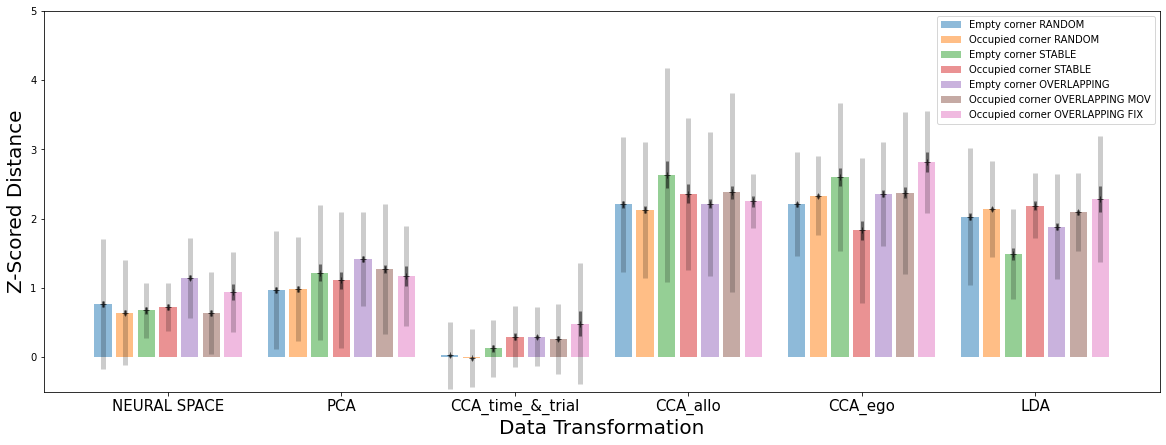

In [49]:
fig, axes = plt.subplots(1,1)

label = ['NEURAL SPACE','PCA','CCA_time_&_trial','CCA_allo','CCA_ego','LDA']
xpos = np.arange(0,6)*8 + 3

axes.bar(np.arange(0,6)*8,empty_corners_mean_random, alpha = 0.5)
axes.bar(np.arange(0,6)*8+1,occupied_corners_mean_random, alpha = 0.5)
    
axes.bar(np.arange(0,6)*8+2,empty_corners_mean_stable, alpha = 0.5)
axes.bar(np.arange(0,6)*8+3,occupied_corners_mean_stable, alpha = 0.5)

axes.bar(np.arange(0,6)*8+4,empty_corners_mean_overlapping, alpha = 0.5)
axes.bar(np.arange(0,6)*8+5,occupied_corners_mean_overlapping_mov, alpha = 0.5)
axes.bar(np.arange(0,6)*8+6,occupied_corners_mean_overlapping_fix, alpha = 0.5)

axes.errorbar(np.arange(0,6)*8, empty_corners_mean_random, empty_corners_std_random, fmt="+", color="k",elinewidth = 5,alpha = 0.2)
axes.errorbar(np.arange(0,6)*8+1, occupied_corners_mean_random, occupied_corners_std_random, fmt="+", color="k",elinewidth = 5,alpha = 0.2)
axes.errorbar(np.arange(0,6)*8, empty_corners_mean_random, empty_corners_sem_random, fmt="+", color="k",elinewidth = 3,alpha = 0.5)
axes.errorbar(np.arange(0,6)*8+1, occupied_corners_mean_random, occupied_corners_sem_random, fmt="+", color="k",elinewidth = 3,alpha = 0.5)

axes.errorbar(np.arange(0,6)*8+2, empty_corners_mean_stable, empty_corners_std_stable, fmt="+",color="k",elinewidth = 5,alpha = 0.2)
axes.errorbar(np.arange(0,6)*8+3, occupied_corners_mean_stable, occupied_corners_std_stable, fmt="+", color="k",elinewidth = 5,alpha = 0.2)
axes.errorbar(np.arange(0,6)*8+2, empty_corners_mean_stable, empty_corners_sem_stable, fmt="+", color="k",elinewidth = 3,alpha = 0.5)
axes.errorbar(np.arange(0,6)*8+3, occupied_corners_mean_stable, occupied_corners_sem_stable, fmt="+", color="k",elinewidth = 3,alpha = 0.5)

axes.errorbar(np.arange(0,6)*8+4, empty_corners_mean_overlapping, empty_corners_std_overlapping, fmt="+", color="k",elinewidth = 5,alpha = 0.2)
axes.errorbar(np.arange(0,6)*8+5, occupied_corners_mean_overlapping_mov, occupied_corners_std_overlapping_mov, fmt="+", color="k",elinewidth = 5,alpha = 0.2)
axes.errorbar(np.arange(0,6)*8+6, occupied_corners_mean_overlapping_fix, occupied_corners_std_overlapping_fix, fmt="+", color="k",elinewidth = 5,alpha = 0.2)
axes.errorbar(np.arange(0,6)*8+4, empty_corners_mean_overlapping, empty_corners_sem_overlapping, fmt="+", color="k",elinewidth = 3,alpha = 0.5)
axes.errorbar(np.arange(0,6)*8+5, occupied_corners_mean_overlapping_mov, occupied_corners_sem_overlapping_mov, fmt="+", color="k",elinewidth = 3,alpha = 0.5)
axes.errorbar(np.arange(0,6)*8+6, occupied_corners_mean_overlapping_fix, occupied_corners_sem_overlapping_fix, fmt="+", color="k",elinewidth = 3,alpha = 0.5)

axes.legend(['Empty corner RANDOM','Occupied corner RANDOM','Empty corner STABLE','Occupied corner STABLE', 'Empty corner OVERLAPPING','Occupied corner OVERLAPPING MOV', 'Occupied corner OVERLAPPING FIX'])
axes.set_xticks(xpos)
axes.set_xticklabels(label, fontsize = 15)
for tick in axes.get_xticklabels():
    tick.set_rotation(0)

axes.set_ylabel('Z-Scored Distance', fontsize = 20)
axes.set_xlabel('Data Transformation', fontsize = 20)
#axes.set_title('RANDOM', fontsize = 20)

axes.set_ylim([-0.5,5])

fig.set_size_inches([20,7])
figure_name = 'representational_distance_corners_in_trials2.png'
fig.patch.set_facecolor('white')
fig.savefig(figure_path + figure_name)
